
# **<h3 align="center"> Capstone Project</h3>**
## **<h3 align="center">Books - Metadata</h3>**
**Group members:**<br>
Alexandra Pinto - 20211599@novaims.unl.pt - 20211599<br>
Ilona Nacu - 20211602@novaims.unl.pt - 20211602<br>
Francisco Farinha - 20211550@novaims.unl.pt - 20211550<br>
João Barradas - 20211590@novaims.unl.pt - 20211590<br>
Rafael Proença  - 2021681@novaims.unl.pt - 2021681<br>

## Introduction
This notebooks will serve to the chat to have a database about the books. If the user want's to know, by description the name of the book, the chat will be capable of recognize. Also, if the user wants to know more information about a certain book, like the release year, the publisher and so on, the chat will be also capable of giving those information.

-----------------------------
## Imports

In [3]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
import numpy as np

----------------------------
## Loading the datasets
Now it is time to, through a function, open the csv files. Inside the archive we have different datasets divided by genre. Since our goal is to have a more complete dataset we will join this datasets. All the datasets were provided by Kaggle:
- preproc_books - https://www.kaggle.com/datasets/ruchi798/bookcrossing-dataset (Retrieved at 20 november)
- books_data and books_rating - https://www.kaggle.com/datasets/mohamedbakhet/amazon-books-reviews?select=books_data.csv (Retrieved at 20 november)


In [4]:
preproc_books = pd.read_csv(r'Data/Book_files/Preprocessed_data.csv')
books_data = pd.read_csv(r'Data/Book_files/archive/books_data.csv')
books_rating = pd.read_csv(r'Data/Book_files/archive/Books_rating.csv')

In [5]:
preproc_books.head(3)

,Unnamed: 0,user_id,location,age,isbn,rating,book_title,book_author,year_of_publication,publisher,img_s,img_m,img_l,Summary,Language,Category,city,state,country
0,0,2,"stockton, california, usa",18.0000,0195153448,0,Classical Mythology,Mark P. O. Morford,2002.0,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,Provides an introduction to classical myths pl...,en,['Social Science'],stockton,california,usa
1,1,8,"timmins, ontario, canada",34.7439,0002005018,5,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,"In a small town in Canada, Clara Callan reluct...",en,['Actresses'],timmins,ontario,canada
2,2,11400,"ottawa, ontario, canada",49.0000,0002005018,0,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,"In a small town in Canada, Clara Callan reluct...",en,['Actresses'],ottawa,ontario,canada


In [6]:
books_data.head(3)

,Title,description,authors,image,previewLink,publisher,publishedDate,infoLink,categories,ratingsCount
0,Its Only Art If Its Well Hung!,NaN,['Julie Strain'],http://books.google.com/books/content?id=DykPA...,http://books.google.nl/books?id=DykPAAAACAAJ&d...,NaN,1996,http://books.google.nl/books?id=DykPAAAACAAJ&d...,['Comics & Graphic Novels'],NaN
1,Dr. Seuss: American Icon,Philip Nel takes a fascinating look into the k...,['Philip Nel'],http://books.google.com/books/content?id=IjvHQ...,http://books.google.nl/books?id=IjvHQsCn_pgC&p...,A&C Black,2005-01-01,http://books.google.nl/books?id=IjvHQsCn_pgC&d...,['Biography & Autobiography'],NaN
2,Wonderful Worship in Smaller Churches,This resource includes twelve principles in un...,['David R. Ray'],http://books.google.com/books/content?id=2tsDA...,http://books.google.nl/books?id=2tsDAAAACAAJ&d...,NaN,2000,http://books.google.nl/books?id=2tsDAAAACAAJ&d...,['Religion'],NaN


There are somethings we migth solve by checking the  dataset as:
- treat the NaN values
- delete link features
- change the names

-------------------------------------
## Preproc Books -  Preprocessing

In [7]:
preproc_books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1031175 entries, 0 to 1031174
Data columns (total 19 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   Unnamed: 0           1031175 non-null  int64  
 1   user_id              1031175 non-null  int64  
 2   location             1031175 non-null  object 
 3   age                  1031175 non-null  float64
 4   isbn                 1031175 non-null  object 
 5   rating               1031175 non-null  int64  
 6   book_title           1031175 non-null  object 
 7   book_author          1031174 non-null  object 
 8   year_of_publication  1031175 non-null  float64
 9   publisher            1031175 non-null  object 
 10  img_s                1031175 non-null  object 
 11  img_m                1031175 non-null  object 
 12  img_l                1031175 non-null  object 
 13  Summary              1031175 non-null  object 
 14  Language             1031175 non-null  object 
 15

Using info() we see that we have some missing values, so we will delete them.

In [8]:
print("\nDataFrame before:")
print(preproc_books.shape)

preproc_books.dropna(inplace=True)

print("\nDataFrame after dropping NaN values:")
print(preproc_books.shape)



DataFrame before:
(1031175, 19)

DataFrame after dropping NaN values:
(982278, 19)


There are some columns that we need to change their names and also delete unnwanted features for the metadata.

In [9]:
# Renaming columns
preproc_books.rename(columns={
    'book_title': 'title',
    'book_author': 'authors',
    'Summary': 'description',
    'Category':'categories',
    'rating':'rating_1'
    }, inplace=True)

columns_to_drop = ['Unnamed: 0', 'user_id', 'location', 'img_s', 'img_m', 'img_l', 'age','city','state']
preproc_books.drop(columns=columns_to_drop, inplace=True)

print("\nDataFrame after dropping specified columns:")
preproc_books.head(2)


DataFrame after dropping specified columns:


,isbn,rating_1,title,authors,year_of_publication,publisher,description,Language,categories,country
0,0195153448,0,Classical Mythology,Mark P. O. Morford,2002.0,Oxford University Press,Provides an introduction to classical myths pl...,en,['Social Science'],usa
1,0002005018,5,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,"In a small town in Canada, Clara Callan reluct...",en,['Actresses'],canada


In [10]:
# Assuming 'preproc_books' is your DataFrame and 'isbn' is the column containing ISBN values

# Remove duplicates based on 'isbn' and keep the first occurrence
preproc_books = preproc_books.drop_duplicates(subset='isbn', keep='first')

# Display the DataFrame after removing duplicates
preproc_books.head(3)


,isbn,rating_1,title,authors,year_of_publication,publisher,description,Language,categories,country
0,0195153448,0,Classical Mythology,Mark P. O. Morford,2002.0,Oxford University Press,Provides an introduction to classical myths pl...,en,['Social Science'],usa
1,0002005018,5,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,"In a small town in Canada, Clara Callan reluct...",en,['Actresses'],canada
15,0060973129,0,Decision in Normandy,Carlo D'Este,1991.0,HarperPerennial,"Here, for the first time in paperback, is an o...",en,['1940-1949'],canada


As we can see there are some 9 values, as we have a lot of data and it is not important for us to have so many values, we will delete this rows.

In [11]:
# Display the shape before deletion
print("Shape before deletion:", preproc_books.shape)

# Remove rows where both 'language' and 'description' are equal to 9
preproc_books = preproc_books[
    ~(
        (preproc_books['Language'] == '9') |
        (preproc_books['description'] == '9') |
        (preproc_books['categories'] == '9')
    )
]

# Display the shape after deletion
print("Shape after deletion:", preproc_books.shape)


Shape before deletion: (264661, 10)
Shape after deletion: (136226, 10)


Now we can advance to the next preprocessing.

-------------------------------------
## Books Data -  Preprocessing

In [12]:
books_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212404 entries, 0 to 212403
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Title          212403 non-null  object 
 1   description    143962 non-null  object 
 2   authors        180991 non-null  object 
 3   image          160329 non-null  object 
 4   previewLink    188568 non-null  object 
 5   publisher      136518 non-null  object 
 6   publishedDate  187099 non-null  object 
 7   infoLink       188568 non-null  object 
 8   categories     171205 non-null  object 
 9   ratingsCount   49752 non-null   float64
dtypes: float64(1), object(9)
memory usage: 16.2+ MB


In [13]:
books_rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000000 entries, 0 to 2999999
Data columns (total 10 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Id                  object 
 1   Title               object 
 2   Price               float64
 3   User_id             object 
 4   profileName         object 
 5   review/helpfulness  object 
 6   review/score        float64
 7   review/time         int64  
 8   review/summary      object 
 9   review/text         object 
dtypes: float64(2), int64(1), object(7)
memory usage: 228.9+ MB


In [14]:
# Assuming 'books_data' and 'books_rating' are the DataFrames you want to merge
merged_books = pd.merge(books_data, books_rating, on='Title', how='inner')

In [15]:
print("\nDataFrame before:")
print(merged_books.shape)

merged_books.dropna(inplace=True)

print("\nDataFrame after dropping NaN values:")
print(merged_books.shape)


DataFrame before:
(3000000, 19)

DataFrame after dropping NaN values:
(174295, 19)


As in the previous dataset, we have year_of_publication, so through feature _publishedDate_ we will extract the year.

In [16]:
# Extracting year and creating a new column 'year_of_publication'
merged_books['year_of_publication'] = merged_books['publishedDate'].str.split('-').str[0]
# Displaying the DataFrame with the new column
merged_books.head(2)

,Title,description,authors,image,previewLink,publisher,publishedDate,infoLink,categories,ratingsCount,Id,Price,User_id,profileName,review/helpfulness,review/score,review/time,review/summary,review/text,year_of_publication
47,The Church of Christ: A Biblical Ecclesiology ...,In The Church of Christ: A Biblical Ecclesiolo...,['Everett Ferguson'],http://books.google.com/books/content?id=kVqRa...,http://books.google.nl/books?id=kVqRaiPlx88C&p...,Wm. B. Eerdmans Publishing,1996,http://books.google.nl/books?id=kVqRaiPlx88C&d...,['Religion'],5.0,0802841899,25.97,ARI272XF8TOL4,Christopher J. Bray,74/81,5.0,955411200,Ecclesiological Milestone,With the publication of Everett Ferguson's boo...,1996
48,The Church of Christ: A Biblical Ecclesiology ...,In The Church of Christ: A Biblical Ecclesiolo...,['Everett Ferguson'],http://books.google.com/books/content?id=kVqRa...,http://books.google.nl/books?id=kVqRaiPlx88C&p...,Wm. B. Eerdmans Publishing,1996,http://books.google.nl/books?id=kVqRaiPlx88C&d...,['Religion'],5.0,0802841899,25.97,A36TPZSH8LBT1,haskell,2/3,5.0,1311465600,Early Christian development of the Church,Everett Ferguson approaches the subject of ear...,1996


In [17]:
# Assuming 'merged_books' is the DataFrame containing the merged data
merged_books.drop_duplicates(subset='Title', keep='first', inplace=True)

In [18]:
merged_books.columns

Index(['Title', 'description', 'authors', 'image', 'previewLink', 'publisher',
       'publishedDate', 'infoLink', 'categories', 'ratingsCount', 'Id',
       'Price', 'User_id', 'profileName', 'review/helpfulness', 'review/score',
       'review/time', 'review/summary', 'review/text', 'year_of_publication'],
      dtype='object')

Now let's change some variables names and drop unnecessary columns

In [21]:
# Renaming columns
merged_books.rename(columns={
    'Title': 'title',
    'book_author': 'author',
    'Summary': 'description',
    'review/score':'score'
    }, inplace=True)

columns_to_drop = ['image', 'previewLink', 'publishedDate', 'infoLink', 'review/helpfulness',
       'review/time', 'review/summary', 'review/text', 'User_id', 'profileName','Id','ratingsCount','Price']
merged_books.drop(columns=columns_to_drop, inplace=True)

print("\nDataFrame after dropping specified columns:")
merged_books.head(2)


DataFrame after dropping specified columns:


,title,description,authors,publisher,categories,score,year_of_publication
47,The Church of Christ: A Biblical Ecclesiology ...,In The Church of Christ: A Biblical Ecclesiolo...,['Everett Ferguson'],Wm. B. Eerdmans Publishing,['Religion'],5.0,1996
195,The Battleship Bismarck,The Bismarck is perhaps the most famous – and ...,['Stefan Draminski'],Bloomsbury Publishing,['History'],3.0,2018


---------------------------------------
## Merging the Datasets
Now that we did the separated the preprocessing, we will merge by title.

In [30]:
final_books= pd.concat([preproc_books, merged_books])
merged_data_books = final_books.groupby('title').agg(lambda x: x.dropna().unique().tolist()).reset_index()
merged_data_books.head()

,title,isbn,rating_1,authors,year_of_publication,publisher,description,Language,categories,country,score
0,A Light in the Storm: The Civil War Diary of ...,[0590567330],[0.0],[Karen Hesse],[1999.0],[Hyperion Books for Children],[Captures the emotions of a young Union girl w...,[en],[['Juvenile Fiction']],[usa],[]
1,"Ask Lily (Young Women of Faith: Lily Series, ...",[0310232546],[8.0],[Nancy N. Rue],[2001.0],[Zonderkidz],"[When Lily enters the seventh grade, she start...",[en],[['Juvenile Fiction']],[usa],[]
2,Beyond IBM: Leadership Marketing and Finance ...,[0962295701],[0.0],[Lou Mobley],[1989.0],"[Teleonet, Incorporated]",[Some of the world&#39;s most successful entre...,[en],[['Business & Economics']],[usa],[]
3,Clifford Visita El Hospital (Clifford El Gran...,[0439188970],[0.0],[Norman Bridwell],[2000.0],[Scholastic],[Clifford acompa a a Emily Elizabeth a visitar...,[es],[['Juvenile Fiction']],[usa],[]
4,Dark Justice,[0399151788],[10.0],[Jack Higgins],[2004.0],[Putnam Publishing Group],[An attempt on the life of the U.S. president ...,[en],[['Fiction']],[usa],[]


Set the empty columns into zero

In [31]:
# Loop through all columns and replace empty lists with zeros
for col in merged_data_books.columns:
    merged_data_books[col] = merged_data_books[col].apply(lambda x: 0 if isinstance(x, list) and len(x) == 0 else x)

In [32]:
def join_elements(x):
    if isinstance(x, list):
        return ', '.join(str(i) if not isinstance(i, float) else str(int(i)) for i in x)
    return x

# Remove brackets from all columns in the DataFrame
merged_data_books = merged_data_books.applymap(join_elements)

C:\Users\xandg\AppData\Local\Temp\ipykernel_30532\2035165279.py:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  merged_data_books = merged_data_books.applymap(join_elements)


In [33]:
merged_data_books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135417 entries, 0 to 135416
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   title                135417 non-null  object
 1   isbn                 135417 non-null  object
 2   rating_1             135417 non-null  object
 3   authors              135417 non-null  object
 4   year_of_publication  135417 non-null  object
 5   publisher            135417 non-null  object
 6   description          135417 non-null  object
 7   Language             135417 non-null  object
 8   categories           135417 non-null  object
 9   country              135417 non-null  object
 10  score                135417 non-null  object
dtypes: object(11)
memory usage: 11.4+ MB


In [34]:
merged_data_books.head(3)

,title,isbn,rating_1,authors,year_of_publication,publisher,description,Language,categories,country,score
0,A Light in the Storm: The Civil War Diary of ...,0590567330,0,Karen Hesse,1999,Hyperion Books for Children,Captures the emotions of a young Union girl wh...,en,['Juvenile Fiction'],usa,0
1,"Ask Lily (Young Women of Faith: Lily Series, ...",0310232546,8,Nancy N. Rue,2001,Zonderkidz,"When Lily enters the seventh grade, she starts...",en,['Juvenile Fiction'],usa,0
2,Beyond IBM: Leadership Marketing and Finance ...,0962295701,0,Lou Mobley,1989,"Teleonet, Incorporated",Some of the world&#39;s most successful entrep...,en,['Business & Economics'],usa,0


In [35]:
# Explode the 'categories' column to unlist the inner lists
merged_data_books = merged_data_books.explode('categories')
merged_data_books['categories'] = merged_data_books['categories'].replace(r"'", '', regex=True)
merged_data_books['categories'] = merged_data_books['categories'].str.strip('[]')
merged_data_books['categories'] = merged_data_books['categories'].str.replace("[", "").str.replace("]", "")
merged_data_books['categories'] = merged_data_books['categories'].str.replace('"', "")

# Visualize the 'categories' column after exploding
merged_data_books['categories']

0                           Juvenile Fiction
1                           Juvenile Fiction
2                       Business & Economics
3                           Juvenile Fiction
4                                    Fiction
                         ...                
135412                               Fiction
135413                               Fiction
135414    Fernsehen - Massenmedien - Wirkung
135415                       Authors, German
135416                     French literature
Name: categories, Length: 135417, dtype: object

In [36]:
merged_data_books['description'] = merged_data_books['description'].str.replace('&#39;', "", regex=False)

In [38]:
# Identify rows where original_release_year or streaming_release_year contain commas
multiple_years_indices = merged_data_books.apply(lambda x: (',' in str(x['rating_1'])) or (',' in str(x['score'])), axis=1)

# Filter out rows with multiple values in either column
merged_data_books = merged_data_books[~multiple_years_indices]

In [40]:
merged_data_books['rating_1'] = merged_data_books['rating_1'].astype(int)
merged_data_books['score'] = merged_data_books['score'].astype(int)

C:\Users\xandg\AppData\Local\Temp\ipykernel_30532\493512007.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_data_books['rating_1'] = merged_data_books['rating_1'].astype(int)
C:\Users\xandg\AppData\Local\Temp\ipykernel_30532\493512007.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_data_books['score'] = merged_data_books['score'].astype(int)


Now we will check the categories.

In [41]:
# Convert genres column to lowercase
merged_data_books['categories'] = merged_data_books['categories'].str.lower()

# Display the modified 'genres' column
merged_data_books['categories']

C:\Users\xandg\AppData\Local\Temp\ipykernel_30532\2485073478.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_data_books['categories'] = merged_data_books['categories'].str.lower()


0                           juvenile fiction
1                           juvenile fiction
2                       business & economics
3                           juvenile fiction
4                                    fiction
                         ...                
135412                               fiction
135413                               fiction
135414    fernsehen - massenmedien - wirkung
135415                       authors, german
135416                     french literature
Name: categories, Length: 130758, dtype: object

In [42]:
# Combine all genres into a single string and split them
all_genres = ','.join(merged_data_books['categories'].explode().dropna())
split_genres = [genre.strip() for genre in all_genres.split(',')]

# Get the frequency of each individual genre
genre_counts = pd.Series(split_genres).value_counts()

# Calculate the percentage of each genre
genre_percentages = (genre_counts / genre_counts.sum()) * 100

# Sort genres by count in descending order
sorted_genres = genre_percentages.sort_values(ascending=False)

# Print percentages for each genre
for genre, percentage in sorted_genres.items():
    print(f"{genre}: {percentage:.2f}%")

fiction: 34.21%
juvenile fiction: 7.27%
biography & autobiography: 3.69%
religion: 3.14%
history: 2.78%
juvenile nonfiction: 2.26%
social science: 1.69%
business & economics: 1.68%
body: 1.32%
mind & spirit: 1.31%
health & fitness: 1.31%
cooking: 1.29%
computers: 1.27%
family & relationships: 1.26%
humor: 1.12%
psychology: 0.87%
science: 0.87%
self-help: 0.85%
travel: 0.78%
literary criticism: 0.73%
poetry: 0.71%
art: 0.68%
philosophy: 0.68%
sports & recreation: 0.66%
political science: 0.62%
language arts & disciplines: 0.58%
nature: 0.58%
reference: 0.55%
performing arts: 0.55%
education: 0.54%
drama: 0.54%
crafts & hobbies: 0.51%
childrens stories: 0.46%
music: 0.45%
comics & graphic novels: 0.44%
medical: 0.40%
pets: 0.38%
detective and mystery stories: 0.36%
literary collections: 0.34%
true crime: 0.33%
gardening: 0.32%
foreign language study: 0.31%
american: 0.28%
technology & engineering: 0.25%
animals: 0.24%
house & home: 0.22%
authors: 0.20%
english: 0.19%
architecture: 0.19%


In [43]:
threshold = 0.20
filtered_genres = sorted_genres[sorted_genres >= threshold]

# Filter the DataFrame based on the genres with percentage >= 0.20
merged_data_books = merged_data_books[merged_data_books['categories'].isin(filtered_genres.index)]

In [44]:
# Define the genre mapping dictionary
genre_mapping = {
    'juvenile fiction':'juvenile, fiction',
    'juvenile nonfiction': 'juvenile, non-fiction'
}

# Iterate through the genre_mapping dictionary and apply replacements
for old_genres, new_genres in genre_mapping.items():
    merged_data_books['categories'] = merged_data_books['categories'].str.replace(old_genres, new_genres)


C:\Users\xandg\AppData\Local\Temp\ipykernel_30532\1012619526.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_data_books['categories'] = merged_data_books['categories'].str.replace(old_genres, new_genres)


C:\Users\xandg\AppData\Local\Temp\ipykernel_30532\3081092090.py:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('viridis', len(sorted_genres))


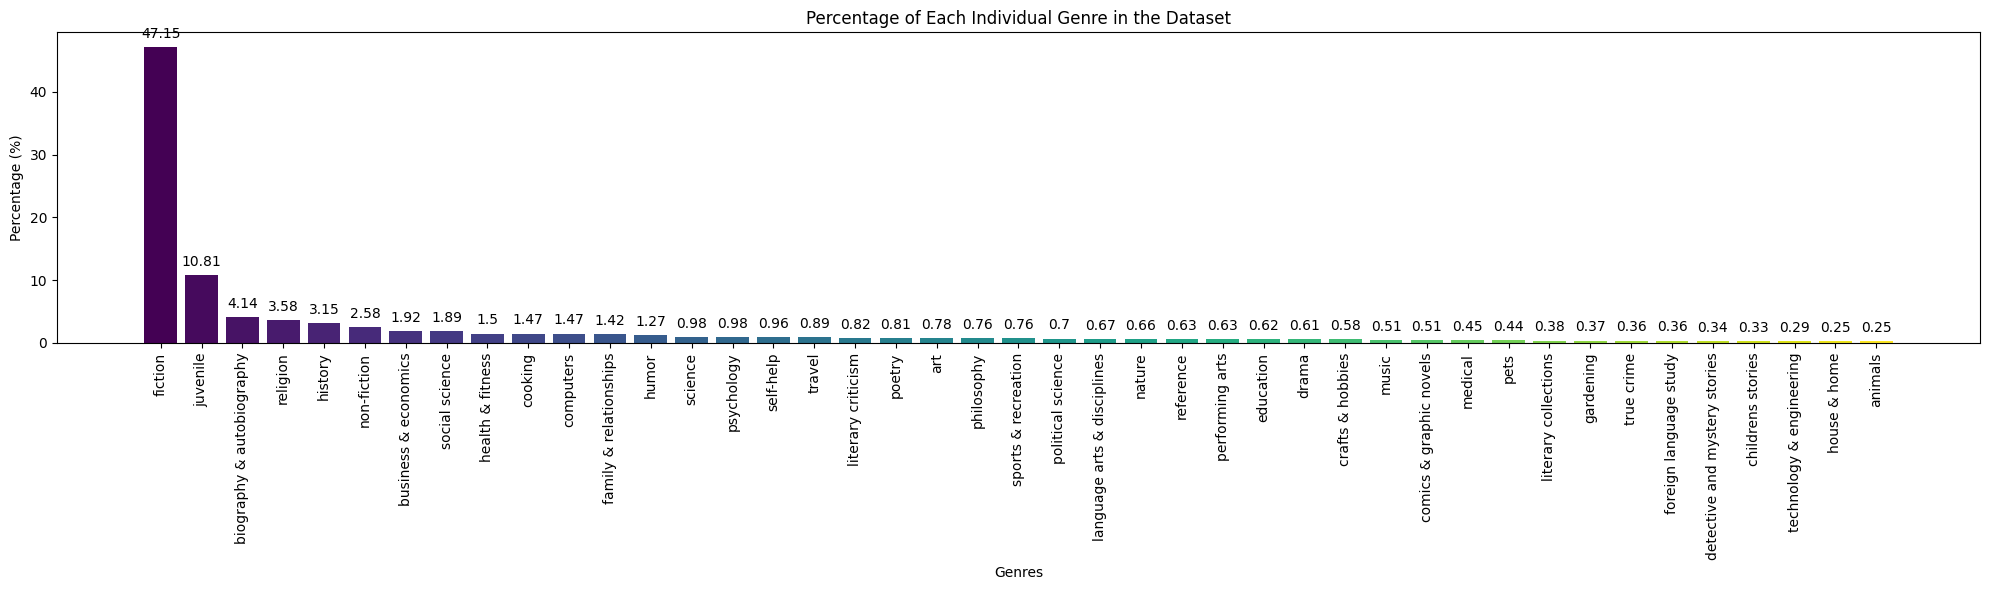

In [45]:
# Combine all genres into a single string and split them
all_genres = ','.join(merged_data_books['categories'].explode().dropna())
split_genres = [genre.strip() for genre in all_genres.split(',')]

# Get the frequency of each individual genre
genre_counts = pd.Series(split_genres).value_counts()

# Calculate the percentage of each genre
genre_percentages = (genre_counts / genre_counts.sum()) * 100

# Sort genres by count in descending order
sorted_genres = genre_percentages.sort_values(ascending=False)

# Customizing color
colors = plt.cm.get_cmap('viridis', len(sorted_genres))  

plt.figure(figsize=(20, 6))
bars = plt.bar(sorted_genres.index, sorted_genres, color=colors(range(len(sorted_genres))))
plt.title('Percentage of Each Individual Genre in the Dataset')
plt.xlabel('Genres')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=90)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 1, round(yval, 2), ha='center', va='bottom')

plt.tight_layout()
plt.show()

#####critiscore


In [46]:
merged_data_books.columns

Index(['title', 'isbn', 'rating_1', 'authors', 'year_of_publication',
       'publisher', 'description', 'Language', 'categories', 'country',
       'score'],
      dtype='object')

In [47]:
ratings = ['rating_1', 'score']
rating_stats = merged_data_books[ratings].describe()
rating_stats.loc[['min', 'max']]

,rating_1,score
min,0.0,0.0
max,10.0,5.0


In [49]:
# Scaling IMDb rating to a range of 0-100
merged_data_books['rating_scaled'] = merged_data_books['rating_1'] * 10

# Scaling stars rating to a range of 0-100
merged_data_books['score_scaled'] = merged_data_books['score'] * 20

C:\Users\xandg\AppData\Local\Temp\ipykernel_30532\1109751759.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_data_books['rating_scaled'] = merged_data_books['rating_1'] * 10
C:\Users\xandg\AppData\Local\Temp\ipykernel_30532\1109751759.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_data_books['score_scaled'] = merged_data_books['score'] * 20


In [50]:
def calculate_criti_score(row):
    ratings = ['rating_scaled','score_scaled']
    available_ratings = [row[rating] for rating in ratings if row[rating] > 0]  # Check for non-zero ratings
    
    if len(available_ratings) == 0:
        return None  # No available ratings

    elif len(available_ratings) == 1:
        return available_ratings[0]  # Only one available rating, return it as CritiScore

    else:
        # Calculate weighted average for available ratings
        weights = [1 / len(available_ratings)] * len(available_ratings)
        criti_score = sum(available_ratings[i] * weights[i] for i in range(len(available_ratings)))
        return criti_score  # Return weighted average of available ratings

# Apply the function to calculate CritiScore for each row
merged_data_books['CritiScore'] = merged_data_books.apply(calculate_criti_score, axis=1)
    
# Remove rows with no available ratings
merged_data_books.dropna(subset=['CritiScore'], inplace=True)

# Round the 'CritiScore' to the nearest whole number and cast to integer
merged_data_books['CritiScore'] = merged_data_books['CritiScore'].round(0).astype(int)

C:\Users\xandg\AppData\Local\Temp\ipykernel_30532\1022652251.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_data_books['CritiScore'] = merged_data_books.apply(calculate_criti_score, axis=1)
C:\Users\xandg\AppData\Local\Temp\ipykernel_30532\1022652251.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_data_books.dropna(subset=['CritiScore'], inplace=True)
C:\Users\xandg\AppData\Local\Temp\ipykernel_30532\1022652251.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col

For curiosity, let's create bins and check the distribution of CritiScore.

C:\Users\xandg\AppData\Local\Temp\ipykernel_30532\3793627591.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = get_cmap('viridis', num_bins)  # Generating colormap


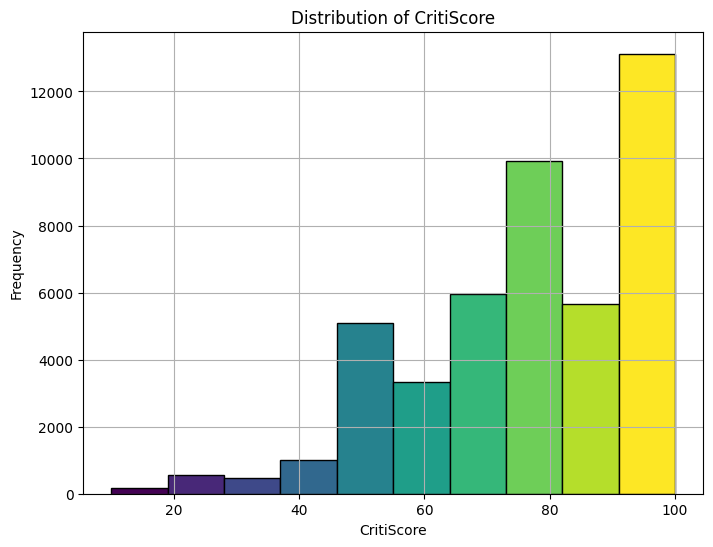

In [51]:
# Define the number of bins and create bins for the 'CritiScore' column
num_bins = 10  # Adjust the number of bins as needed
bins = pd.cut(merged_data_books['CritiScore'], num_bins)

# Plot the histogram of CritiScore distribution with 'viridis' colormap
plt.figure(figsize=(8, 6))
colormap = get_cmap('viridis', num_bins)  # Generating colormap
plt.hist(merged_data_books['CritiScore'], bins=num_bins, edgecolor='black')

# Set colors for each bar using the colormap
for i, patch in enumerate(plt.gca().patches):
    patch.set_facecolor(colormap(i))

plt.title('Distribution of CritiScore')
plt.xlabel('CritiScore')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

Now we will delete unnecessary columns.

In [52]:
merged_data_books.columns

Index(['title', 'isbn', 'rating_1', 'authors', 'year_of_publication',
       'publisher', 'description', 'Language', 'categories', 'country',
       'score', 'rating_scaled', 'score_scaled', 'CritiScore'],
      dtype='object')

In [53]:
# List of columns to delete
columns_to_delete = ['rating_1','score', 'rating_scaled', 'score_scaled']

# Dropping the specified columns
merged_data_books.drop(columns=columns_to_delete, inplace=True)

C:\Users\xandg\AppData\Local\Temp\ipykernel_30532\299223432.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_data_books.drop(columns=columns_to_delete, inplace=True)


Now that we create the Data, we will save the dataset.

In [55]:
# Save as CSV
merged_data_books.to_csv(r'Data/Metadata/books.csv', index=False)